**Avant de débuter ce TP** :

1. **Changez le type d'exécution sur Google Colab** : `Exécution > Modifiez le type d'exécution > T4 GPU`
2. **Installez les paquets ci-dessous** :

In [1]:
! pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 14.5 MB/s eta 0:00:00


# Inférence avec des modèles pré-entraînés

De nombreux modèles pré-entraînés sont publiquement disponibles sur internet.
Certains sont assez généraux, mais la plupart sont des des modèles affinés sur des tâches spécifiques.

Une interface de programmation d'application (API pour *application programming interface*) est [Hugging Face](https://huggingface.co).
Plusieurs paquets Python, tels que [transformers](https://huggingface.co/docs/transformers/index) et [diffusers](https://huggingface.co/docs/diffusers/index), ont été développés dans cet écosystème et mettent à disposition des modèles pré-entraînés.

La liste de tous les modèles sont disponibles sur Hugging Face est disponible [ici](https://huggingface.co/models).
À ce jour, il y a plus d'un million de modèles pré-entraînés disponibles.
Il est facile de filtrer la liste des modèles en fonction de certains critères (types de tâche, bibliothèques, jeux de données, langues, licences, etc.)

Dans ce notebook, on ne va pas entraîner de modèle.
On va seulement effectuer de l'inférence avec des modèles pré-entraînés et publiquement disponibles.
L'objectif de ce notebook est d'apprendre à chercher des modèles pré-entraînés et de les utiliser sans utiliser une interface graphique (comme ChatGPT).
L'autre avantage, avec des modèles pré-entraînés et publiquement disponibles, est que la seule limite d'utilisation est la puissance de calcul.

## Systèmes de questions-réponses

Les [systèmes de questions-réponses](https://fr.wikipedia.org/wiki/Systèmes_de_questions-réponses) est un système informatique permettant de répondre automatiquement à des questions posées par des humains, lors d'un échange fait en langue naturelle.

On va utiliser le modèle [RoBERTa-base-squad2](https://huggingface.co/deepset/roberta-base-squad2), qui est le modèle [RoBERTa](https://huggingface.co/roberta-base) mais affiné sur le jeu de données [SQuAD2.0](https://huggingface.co/datasets/squad_v2).
Ce modèle a été entraîné sur des paires de questions et de réponses, avec notamment des questions pour lesquelles il est impossible de répondre.

L'entrée du modèle est un dictionnaire avec les paires suivantes de clés et de valeurs :
* la clé `'question'` dont la valeur est une chaîne de caractères correspondant à la question,
* la clé `'context'` dont la valeur est une chaîne de caractères contenant l'information nécessaire pour répondre à la question.

La sortie du modèle est un dictionnaire avec les paires suivantes de clés et de valeurs :
* la clé `'score'` dont la valeur est score de confiance du modèle dans sa réponse,
* la clé `'start'` dont la valeur est l'indice du premier caractère de la réponse,
* la clé `'start'` dont la valeur est l'indice du dernier caractère de la réponse,
* la clé `'answer'` dont la valeur est la réponse renvoyée par le modèle.

Voici un exemple d'utilisation de ce modèle :

```python
>>> from transformers import pipeline
>>> question_answering = pipeline(
...     'question-answering',
...     model='deepset/roberta-base-squad2',
...     tokenizer="deepset/roberta-base-squad2"
... )
>>> question_answering({
...     'question': "How many planets are there in the solar system?",
...     'context': (
...         "The eight planets of the solar system are Mercury, Venus, Earth, "
...         "Mars, Jupiter, Saturn, Uranus, and Neptune."
...     )
... })
{'score': 0.7999436855316162, 'start': 4, 'end': 9, 'answer': 'eight'}
```

Une limite importante du modèle est que la réponse doit se trouver explicitement (c'est-à-dire sous la forme de mots) dans le contexte.
Par exemple, si on enlève le mot `'eight'` du contexte, la réponse est décevante (mais le score de confiance est également beaucoup plus faible).

```python
>>> question_answering({
...     'question': "How many planets are there in the solar system?",
...     'context': (
...         "The planets of the solar system are Mercury, Venus, Earth, "
...         "Mars, Jupiter, Saturn, Uranus, and Neptune."
...     )
... })
{'score': 0.01189940981566906,
 'start': 46,
 'end': 102,
 'answer': 'Venus, Earth, Mars, Jupiter, Saturn, Uranus, and Neptune'}
```

### Exercice 1

Utilisez ce modèle avec vos propres paires de questions et de contextes.

In [2]:
from transformers import pipeline

question_answering = pipeline(
    'question-answering',
    model='deepset/roberta-base-squad2',
    tokenizer="deepset/roberta-base-squad2"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [3]:
question_answering({
    'question': "How many planets are there in the solar system?",
    'context': (
        "The eight planets of the solar system are Mercury, Venus, Earth, "
        "Mars, Jupiter, Saturn, Uranus, and Neptune."
    )
})

{'score': 0.8122279644012451, 'start': 4, 'end': 9, 'answer': 'eight'}

In [4]:
question_answering({
    'question': "How many planets are there in the solar system?",
    'context': (
        "The planets of the solar system are Mercury, Venus, Earth, "
        "Mars, Jupiter, Saturn, Uranus, and Neptune."
    )
})

{'score': 0.01209552027285099,
 'start': 45,
 'end': 101,
 'answer': 'Venus, Earth, Mars, Jupiter, Saturn, Uranus, and Neptune'}

In [5]:
question_answering({
    'question': "Where am I teaching?",
    'context': "My name is Johann and I'm a an assistant professor of computer science at ENSAI."
})

{'score': 0.7823657393455505, 'start': 74, 'end': 79, 'answer': 'ENSAI'}

In [6]:
question_answering({
    'question': "What is Geralt killing?",
    'context': (
        "Geralt is a Witcher, a man whose magic powers, enhanced by long "
        "training and a mysterious elixir, have made him a brilliant fighter "
        "and a merciless hunter. Yet he is no ordinary killer: his targets are "
        "the multifarious monsters and vile fiends that ravage the land "
        "and attack the innocent."
    )
})

{'score': 0.2723528742790222,
 'start': 206,
 'end': 243,
 'answer': 'multifarious monsters and vile fiends'}

In [7]:
question_answering({
    'question': "Where is Aloy going?",
    'context': (
        "Horizon Forbidden West continues the story of Aloy, a young hunter of the "
        "Nora tribe and a clone of the Old World scientist Elisabet Sobeck, as she "
        "leads a band of companions on a quest to the frontier region known as the "
        "Forbidden West to find the source of a mysterious plague that kills all it "
        "infects. On her journey across these lands, Aloy encounters new regions "
        "ravaged by massive storms and deadly machines, and conflicts with a tribe "
        "of nomadic raiders, some of which have tamed the machines as war mounts. "
        "She discovers a vast array of environments and ecosystems, including lush "
        "valleys, dry deserts, snowy mountains, tropical beaches, ruined cities, "
        "and underwater settings."
    )
})

{'score': 0.176852285861969,
 'start': 189,
 'end': 236,
 'answer': 'the frontier region known as the Forbidden West'}

## Génération d'image à partir de texte

Le [*prompt art*](https://fr.wikipedia.org/wiki/Prompt_art) ([*text-to-image model*](https://en.wikipedia.org/wiki/Text-to-image_model) est une technologie qui consiste à créer des oeuvres d'art au moyen de l'intelligence artificielle en fournissant des mots clés en entrée du modèle.
De tels modèles ont commencé à être développés au milieu des années 2010.
Aujourd'hui, les images renvoyées par des modèles tels que [DALL-E 2](https://openai.com/dall-e-2), [Imagen](https://imagen.research.google), [Stable Diffusion](https://stability.ai/stable-diffusion), and [Midjourney](https://www.midjourney.com/showcase/recent/) sont proches de vraies photographies ou d'images générées manuellement par un•e artiste humain•e.

Nous allons utiliser le modèle [MosaicArt](https://huggingface.co/Guizmus/MosaicArt) pour générer des images de mosaïque.
Ce modèle est basé sur le modèle [Stable Diffusion 2](https://huggingface.co/stabilityai/stable-diffusion-2-1), mais affiné en utilisant [DreamBooth](https://dreambooth.github.io).

Ci-dessous se trouve une illustration d'images générées par ce modèle.

[<img src="https://huggingface.co/Guizmus/MosaicArt/resolve/main/showcase.jpg" width="450"/>](https://huggingface.co/Guizmus/MosaicArt/resolve/main/showcase.jpg)

Voici un exemple d'utilisation de ce modèle. Le token `"Mosaic Art"` au début du *prompt* indique que l'on veut générer des images de mosaïque.

```python
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch


# Define the generator
mosaic_art_generator = StableDiffusionPipeline.from_pretrained(
    "Guizmus/MosaicArt", torch_dtype=torch.float16
).to("cuda")

# Generate an image given a prompt
prompt = "Mosaic Art dog on the moon"
image = mosaic_art_generator(prompt).images[0]

# Plot the image
plt.imshow(image)
plt.xticks([]); plt.yticks([]);
```

### Exercice 2

Utilisez ce modèle pré-entraîné pour générer des images représentant des mosaïques.

In [8]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt
import torch

mosaic_art_generator = StableDiffusionPipeline.from_pretrained(
    "Guizmus/MosaicArt", torch_dtype=torch.float16
).to("cuda")

model_index.json:   0%|          | 0.00/512 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.02k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/667 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

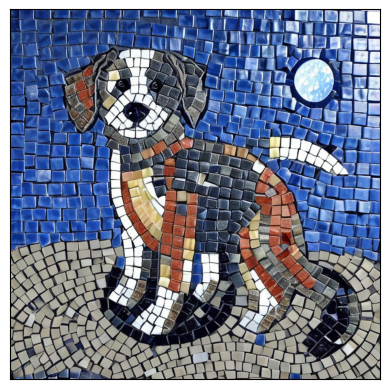

In [9]:
prompt = "Mosaic Art dog on the moon"
image = mosaic_art_generator(prompt).images[0]
plt.imshow(image)
plt.xticks([]); plt.yticks([]);

  0%|          | 0/50 [00:00<?, ?it/s]

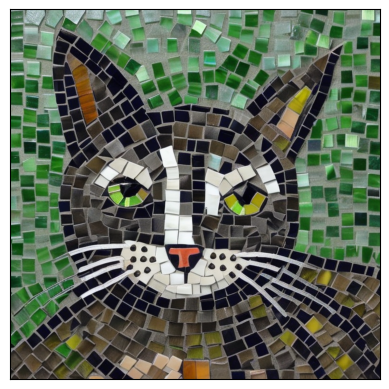

In [10]:
prompt = "Mosaic Art cat in a forest"
image = mosaic_art_generator(prompt).images[0]
plt.imshow(image)
plt.xticks([]); plt.yticks([]);

  0%|          | 0/50 [00:00<?, ?it/s]

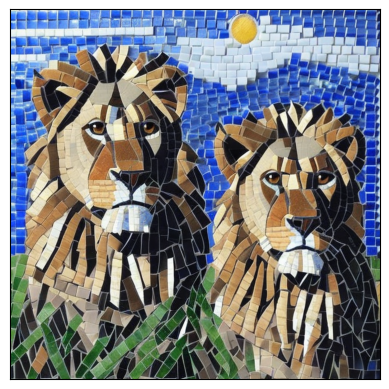

In [11]:
prompt = "Mosaic Art lions in the wild"
image = mosaic_art_generator(prompt).images[0]
plt.imshow(image)
plt.xticks([]); plt.yticks([]);

## Traduction

La [traduction](https://fr.wikipedia.org/wiki/Traduction) est le fait de faire passer un texte rédigé dans une langue dans une autre langue.
La [traduction automatique](https://fr.wikipedia.org/wiki/Traduction_automatique) désigne la traduction brute d'un texte entièrement réalisée par un ou plusieurs programmes informatiques.
La [traduction automatique neuronale](https://fr.wikipedia.org/wiki/Traduction_automatique_neuronale) est une approche de traduction automatique qui utilise un réseau neuronal artificiel pour prédire la probabilité d'une séquence de mots, généralement en modélisant puis en traduisant des phrases entières avec un seul modèle.

Les traducteurs automatiques tels que [DeepL Translator](https://www.deepl.com/en/translator) et [Goole Translate](https://translate.google.com) sont basés sur des réseaux de neur based on artifical neural networks.

Nous allons utiliser une plus petite version du modèle pré-entraîné [Text-To-Text Transfer Transformer](https://huggingface.co/t5-small) (T5-small).
Bien que ce modèle puisse être utilisé pour de [nombreuses tâches du traitement automatique des langues](https://huggingface.co/docs/transformers/model_doc/t5#resources), nous allons nous focaliser sur la traduction uniquement.
Ce plus petit modèle fonctionne pour quatre langues : anglais, français, roumain et allemand.

Voici un exemple d'utilisation de ce modèle :

```python
>>> from transformers import T5Tokenizer, T5ForConditionalGeneration
>>> tokenizer_t5 = T5Tokenizer.from_pretrained("t5-small")
>>> model_t5 = T5ForConditionalGeneration.from_pretrained("t5-small")
>>> sentence = "Iris is a flowering plant genus of 310 accepted species with showy flowers."
>>> input_ids = tokenizer(f"translate English to French: {sentence}", return_tensors="pt").input_ids
>>> outputs = model.generate(input_ids, max_new_tokens=50)
>>> print(tokenizer.decode(outputs[0], skip_special_tokens=True))
```
```
Iris est un genre de plantes en fleurs de 310 espèces acceptées avec des fleurs d'abondance.
```

Porter une attention particulière à deux éléments :

* Le début du *prompt* indique la tâche : `'translate English to French: '` pour traduire de l'anglais vers le français.
* Il semblerait que seul l'anglais soit disponible pour la langue de la phrase à traduire. Donc il y a trois tâches possible : anglais > français, anglais > allemand et anglais > roumain.
* `max_new_tokens` indique le nombre maximum de tokens à générer.

### Exercice 3

Utilisez ce modèle pré-entraîné pour traduire des phrases d'une langue à une autre parmi les langues disponibles avec ce modèle.

In [12]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer_t5 = T5Tokenizer.from_pretrained("t5-small")
model_t5 = T5ForConditionalGeneration.from_pretrained("t5-small")

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [13]:
sentence = "Iris is a flowering plant genus of 310 accepted species with showy flowers."

input_ids = tokenizer_t5(f"translate English to French: {sentence}", return_tensors="pt").input_ids
outputs = model_t5.generate(input_ids, max_new_tokens=50)
print(tokenizer_t5.decode(outputs[0], skip_special_tokens=True))

Iris est un genre de plantes en fleurs de 310 espèces acceptées avec des fleurs d'abondance.


In [14]:
sentence = "They had us in the first half, not gonna lie."

input_ids = tokenizer_t5(f"translate English to French: {sentence}", return_tensors="pt").input_ids
outputs = model_t5.generate(input_ids, max_new_tokens=50)
print(tokenizer_t5.decode(outputs[0], skip_special_tokens=True))

Ils nous avaient en première moitié, pas à m'en moudre.


In [17]:
sentence = ("Time flies by so fast.")

input_ids = tokenizer_t5(f"translate English to Romanian: {sentence}", return_tensors="pt").input_ids
outputs = model_t5.generate(input_ids, max_new_tokens=50)
print(tokenizer_t5.decode(outputs[0], skip_special_tokens=True))

Timpul trece atât de repede.


In [18]:
sentence = ("Time flies by so fast.")

input_ids = tokenizer_t5(f"translate English to German: {sentence}", return_tensors="pt").input_ids
outputs = model_t5.generate(input_ids, max_new_tokens=50)
print(tokenizer_t5.decode(outputs[0], skip_special_tokens=True))

Die Zeit schreitet so schnell ab.
